1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

Numpy documentation https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html

Mersenne Twister - PRNG (pseudorandom number generator) https://en.wikipedia.org/wiki/Mersenne_Twister


## Purpose of numpy.random

Random number generation is vital for many practical programming needs such as security, model-building, simulation creation and statistical research. Of course, being deterministic machines, computers cannot create truly random numbers and so simulate randomness to create what are called pseudorandom numbers. These numbers are generally drawn from probability distributions and require an initial input seed to which an algorithm is applied in order to generate numbers in a predetermined fashion.  

https://stackoverflow.com/questions/4156907/why-is-random-not-so-random

https://www.eriksmistad.no/pseudo-random-numbers-and-sampling-from-probability-distributions/

### Why use numpy.random instead of built-in random.random?
While random.random by default produces single random numbers, it can produce multiple if used with the range function. However, numpy.random allows you to produce increasingly complex arrays of random numbers. https://realpython.com/python-random/#prngs-for-arrays-numpyrandom

According to Python for Data Analysis (p. 118) numpy.random supplements the random module with a few extra probability distributions and functions
https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

<br>

## Simple Random Data
At its most basic, the numpy.random package is used to generate random data or arrays of data, generally numerical. There are several functions within this package that create simple random data and each one does so in different ways. Before I move on to the more complex probability distributions and seed functions of the package, I will first discuss the following modules in this section of the package:

- rand
- randn
- randint
- random_sample
- choice
- bytes

### RAND 

The **rand** function generates a floating point number or array of floating point numbers from the half open interval \[0, 1), meaning that it includes every number greater than or equal to 0 and less than 1. If no arguments are passed to the function, a single random number is returned but **rand** is capable of generating large arrays of randomly generated numbers when integer arguments are passed. There is no limit to the number of arguments that can be passed so these arrays can be hugely complex. 

In [75]:
# Passing no arguments to generate a single random number.
print("\033[1m" + "Generates a single random number:" + "\033[0m")
print(np.random.rand())
print()

# Passing (x, y) arguments will return x arrays with y values in each.
print("\033[1m" + "Generates 2 arrays with 4 random numbers in each:" + "\033[0m")
print(np.random.rand(2, 4))
print()

# Passing x * y * z will return x arrays containing y arrays that have z values.
print("\033[1m" + "Generates 2 arrays with each containing 4 arrays and each of those containing 6 random numbers:" + "\033[0m")
print(np.random.rand(2, 4, 6))


Generates a single random number:
0.4269082582296685

Generates 2 arrays with 4 random numbers in each:
[[0.57168222 0.29692826 0.67355056 0.06062687]
 [0.88338779 0.46860577 0.0495071  0.15944004]]

Generates 2 arrays with each containing 4 arrays and each of those containing 6 random numbers:
[[[0.53755841 0.86960639 0.20570704 0.9125905  0.32282382 0.68893345]
  [0.23209411 0.13993033 0.30963894 0.5273925  0.63029728 0.85628943]
  [0.84920141 0.56745741 0.21077218 0.5742359  0.71080558 0.93609569]
  [0.79839043 0.94715455 0.98341709 0.71176033 0.47012643 0.53990621]]

 [[0.22975004 0.67211894 0.26629675 0.36948111 0.85068069 0.19659378]
  [0.4355865  0.17501012 0.15121539 0.64879456 0.69210436 0.12890125]
  [0.257875   0.64691297 0.01862424 0.3937812  0.30334268 0.25330295]
  [0.57063506 0.31023039 0.50713434 0.73665798 0.90116102 0.81759026]]]


<br>

#### Distribution

The numbers from **rand** are generated from a continuous uniform distribution, meaning that every number in the \[0, 1) range has an equal chance of being returned as any other. The plot below demonstrates this distribution across 10,000 randomly generated numbers from the **rand** function.

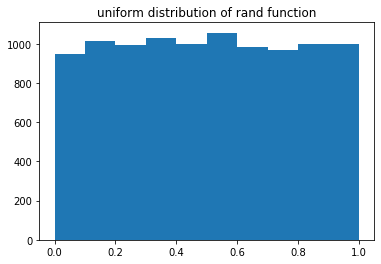

In [78]:
# Demonstrating the uniform distribution of the rand function.
x = np.random.rand(10000)
plt.hist(x)
plt.title("uniform distribution of rand function")
plt.show()

<br>

#### Similar Functions

##### random

There is another function in the numpy.random package called **random** that is the same as the **rand** function except that, while **rand** takes multiple arguments to build the shape of an array, **random** only accepts one argument. For a multi-dimensional array, a tuple must be passed to **random** in order to function correctly [1](https://stackoverflow.com/a/47232184). This can be useful when there are variables containing tuples from which one wants to create an array of random numbers.

In [108]:
# Demonstrating the difference between rand and random.
print("\033[1m" + "2 x 4 array from rand:" + "\033[0m")
print(np.random.rand(2, 4))
print()

# Passing a tuple
print("\033[1m" + "2 x 4 array from random:" + "\033[0m")
print(np.random.random((2, 4)))
print()

# Passing a variable that contains a tuple
t = (2, 4)
print("\033[1m" + "2 x 4 array from random using a variable containing a tuple:" + "\033[0m")
print(np.random.random(t))


2 x 4 array from rand:
[[0.41824995 0.64050347 0.25644755 0.47107369]
 [0.01644862 0.84400977 0.73741419 0.81681228]]

2 x 4 array from random:
[[0.30325027 0.82267791 0.80261185 0.1335626 ]
 [0.19610598 0.75963543 0.7112754  0.14220016]]

2 x 4 array from random using a variable containing a tuple:
[[0.60941846 0.75660492 0.19096663 0.46782608]
 [0.82415873 0.58084301 0.44768444 0.28304995]]



##### uniform

The \[0, 1) range cannot be adjusted within the **rand** function, but there is a related function within numpy.random called **uniform**, which works in largely the same way as **rand** but allows a custom range to be passed. Again this is a half open interval, generating numbers greater than or equal to the low number and less than the high number. Below is an example of the function in operation and further illustration demonstrating the uniform probability distribution.

Generates 2 arrays with 4 random numbers in each within the custom range [-5, 10):
[[-3.86678293  7.47715533  0.87454956  1.12518564]
 [ 2.77054753  5.92373405 -1.35382034  0.55328663]]

Generates 4 random numbers in the custom range [-5, 10):
[1.66631181 4.69786302 6.81958815 6.65598413]



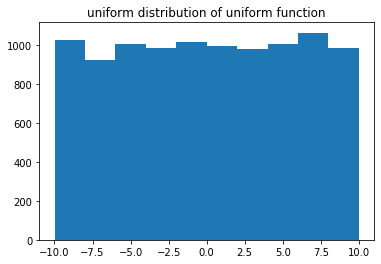

In [81]:
# Passing low and high arguments with size of (x, y) arguments will return x arrays with y values in each.
print("\033[1m" + "Generates 2 arrays with 4 random numbers in each within the custom range [-5, 10):" + "\033[0m")
print(np.random.uniform(low=-5, high=10, size =(2, 4)))
print()

# Demonstrating it is not necessary to have 'low=' or 'high=' to operate the function. 
# 'size=' is necessary if more than one array is required.
print("\033[1m" + "Generates 4 random numbers in the custom range [-5, 10):" + "\033[0m")
print(np.random.uniform(-5, 10, 4))
print()

# Demonstrating the uniform distribution of the uniform function.
x = np.random.uniform(-10, 10, 10000)
plt.hist(x)
plt.title("uniform distribution of uniform function")
plt.show()

<br>

### RANDN

**randn** functions in the same way as **rand** when generating numbers. Without any arguments, it will produce a single randomly generated number and with arguments will produce increasingly complex arrays of numbers. 

In [50]:
# Passing no arguments to generate a single random number:
print("\033[1m" + "Generates a single random number:" + "\033[0m")
print(np.random.randn())
print()

# Passing (x, y) arguments will return x arrays with y values in each
print("\033[1m" + "Generates 2 arrays with 4 random numbers in each:" + "\033[0m")
print(np.random.randn(2, 4))
print()

# Passing x * y * z will return x arrays containing y arrays that have z values
print("\033[1m" + "Generates 2 arrays with each containing 4 arrays and each of those containing 6 random numbers:" + "\033[0m")
print(np.random.randn(2, 4, 6))


Generates a single random number:
0.3357532000454819

Generates 2 arrays with 4 random numbers in each:
[[ 0.50022381  0.06442193  0.68657356 -1.34103987]
 [-0.59141593 -0.70972824 -0.86609263  1.08758428]]

Generates 2 arrays with each containing 4 arrays and each of those containing 6 random numbers:
[[[ 1.46664857  0.03481889 -0.13332738 -0.76455596  0.42888635
    1.41132711]
  [-1.73824349  0.68410982  1.65967208 -0.88098273 -0.3550863
    0.16943567]
  [ 2.53764467  0.75672168 -0.15469408 -1.40173335 -0.90931445
   -0.8546788 ]
  [ 1.36796446 -0.64185005 -1.796615   -0.59911686 -0.00595855
    0.60282169]]

 [[-2.30035864  0.7311893   0.6338675  -0.57562013 -1.31690469
   -0.34330117]
  [ 0.46993789  0.09116334  0.49581518 -0.3926776   1.67782587
   -0.27367697]
  [ 0.35639842 -2.68063585  0.77587065 -0.69842642 -1.75445047
    0.28985486]
  [-0.52797611 -1.55151975 -0.74980907 -0.12843233 -0.5850609
   -0.49827719]]]


<br>

#### Distribution

What separates the **randn** function from **rand** is that numbers are generated from a normal Gaussian distribution rather that a uniform distribution. In this function the normal distribution has a mean of 0 and a variance of 1. This means that the majority of numbers generated centre around 0 and generally range between -1 and 1. The plot below helps to illustrate this; of the 10,000 numbers generated, the vast majority are within the -1 to 1 range and peak at the 0 mark. Looking again at the numbers generated above, it can be seen that they largely sit within the range (-1, 1).

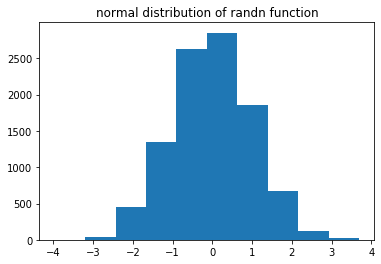

In [82]:
# Demonstrating the normal distribution of the randn function.
x = np.random.randn(10000)
plt.hist(x)
plt.title("normal distribution of randn function")
plt.show()

<br>

#### Similar Functions

##### standard_normal

Like **rand** and **random**, **randn** has the same relationship with another numpy.random function called **standard_normal**, which only takes a single argument but can accept tuples.  

In [111]:
# Demonstrating the difference between randn and standard_normal.
print("\033[1m" + "2 x 4 array from randn:" + "\033[0m")
print(np.random.randn(2, 4))
print()

# Passing a tuple
print("\033[1m" + "2 x 4 array from standard_normal:" + "\033[0m")
print(np.random.standard_normal((2, 4)))
print()

# Passing a variable that contains a tuple
t = (2, 4)
print("\033[1m" + "2 x 4 array from standard_normal using a variable containing a tuple:" + "\033[0m")
print(np.random.standard_normal(t))


2 x 4 array from randn:
[[-0.70015486  0.36753351 -0.04841517  0.79109805]
 [ 0.21993836  0.93299937  0.01860728 -0.45256597]]

2 x 4 array from standard_normal:
[[ 0.12734521  0.62405345 -0.27052175  0.27150867]
 [ 0.04806522  1.05313469  0.61467652 -0.47636738]]

2 x 4 array from standard_normal using a variable containing a tuple:
[[-1.0429268   0.25128135  0.62571259  0.41854783]
 [-0.59122103  0.55106732 -0.93918397  0.5244816 ]]



##### normal

Again similar to **rand**'s range, the mean (0) and standard deviation (1) cannot be altered within the **randn** function but there is another function in the numpy.random package that returns random numbers from a customised normal distribution range. The **normal** function takes a *loc* argument to determine the mean, a *scale* argument for the standard deviation, and a *size* argument for the output shape. In each of the functions below, the output should largely be in the range (2, 8) and centre around 5.      

Generates 2 arrays with 4 random numbers from the custom normal distribution:
[[ 3.31607107  7.41054527  7.16076317  6.92728205]
 [-0.36584526  6.38362412  7.12202476  7.1817628 ]]

Generates 4 random numbers from the custom normal distribution:
[-0.58866717  4.43553258  5.13650803  1.49370273]



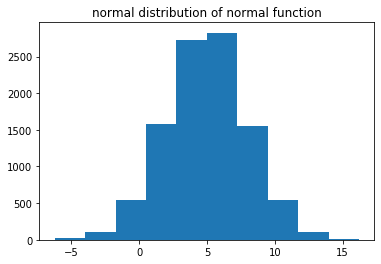

In [116]:
# Passing loc and scale arguments with size of (x, y) arguments will return x arrays with y values in each.
print("\033[1m" + "Generates 2 arrays with 4 random numbers from the custom normal distribution:" + "\033[0m")
print(np.random.normal(loc=5, scale=3, size =(2, 4)))
print()

# Demonstrating it is not necessary to have 'loc=' or 'scale=' to operate the function. 
# 'size=' is necessary if more than one array is required.
print("\033[1m" + "Generates 4 random numbers from the custom normal distribution:" + "\033[0m")
print(np.random.normal(5, 3, 4))
print()

# Demonstrating the normal distribution of the normal function.
x = np.random.normal(5, 3, 10000)
plt.hist(x)
plt.title("normal distribution of normal function")
plt.show()

<br>

### randint
Returns randomly generated integers of a given range. This function will not work if there are no arguments passed.
If only one argument is passed, the range runs from 0 up to but not including that number, making it a half-open interval. The code below will return a random number from the range 0 - 9 inclusive. If a float rather than integer is passes, it will round down to the nearest integer. 

low - lowest number in the range. If no high argument is passed then the range runs up to but does not include this number.

high - highest number in the range. Selection is made from lowest number up to but not including this number.

size - shape of output

dtype - specify data type of the output. tried changing to float32 below but not working...

There's another function listed in the numpy.random documentation called random_integer but this has been deprecated - use randint instead.

In [7]:
np.random.randint(10)

1

In [29]:
np.random.randint(6, 10, dtype=np.uint8)

8

In [10]:
# example with magic 8 ball
# help from Automate the boring stuff p. 64

def Answer(number):
    if number == 1: 
        return "Yes."
    elif number == 2:
        return "Most likely."
    elif number == 3:
        return "All signs point to yes."
    elif number == 4:
        return "Ask again later."
    elif number == 5:
        return "Possibly."
    elif number == 6:
        return "Outlook not so good."
    elif number == 7:
        return "Doubtful"
    elif number == 8:
        return "No."
    
print("Will I ever understand the numpy.random package?")
print(Answer(np.random.randint(1, 9)))

Will I ever understand the numpy.random package?
Ask again later.


In [11]:
np.typecodes

{'Character': 'c',
 'Integer': 'bhilqp',
 'UnsignedInteger': 'BHILQP',
 'Float': 'efdg',
 'Complex': 'FDG',
 'AllInteger': 'bBhHiIlLqQpP',
 'AllFloat': 'efdgFDG',
 'Datetime': 'Mm',
 'All': '?bhilqpBHILQPefdgFDGSUVOMm'}

### random_sample

There are four functions in the numpy.random library that all operate in the same way:
1. numpy.random.random
2. numpy.random.ranf
3. numpy.random.sample
4. numpy.random.random_sample

https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions
They are essentially all aliases for the random_sample function which returns a single floating point number or array of numbers in the half-open interval 0.0 - 1.0

Difference between random_sample and rand https://stackoverflow.com/questions/47231852/np-random-rand-vs-np-random-random

In [12]:
np.random.random_sample((2, 4, 6))


array([[[0.62100486, 0.51537364, 0.0142774 , 0.43423034, 0.86748777,
         0.85386598],
        [0.67683242, 0.70782807, 0.68169609, 0.08239026, 0.05352433,
         0.00187135],
        [0.05045295, 0.08241509, 0.11068995, 0.35364708, 0.35658044,
         0.75212099],
        [0.76137876, 0.05566612, 0.93493396, 0.31561129, 0.50426903,
         0.64107071]],

       [[0.14298885, 0.11959252, 0.68932583, 0.12797812, 0.70587531,
         0.15560026],
        [0.76763189, 0.14839572, 0.65192484, 0.52080305, 0.9501704 ,
         0.12354955],
        [0.47891489, 0.9830948 , 0.79692724, 0.46236512, 0.93975466,
         0.35966188],
        [0.57605253, 0.41927986, 0.73833369, 0.65286536, 0.96203774,
         0.77854297]]])

### choice
Similar to randint in that it generates a random integer and you can specify a range. However, choice can accept tuples, lists or numpy arrays as input.

size - allows you to determine the shape of the output

replace - true/false boolean. If false, the returned numbers never repeat in the output. Once a number has been generated, it it removed from the pool of available numbers. This allows for unique numbers only. It can generate an error if the pool of numbers to choose from is smaller than output shape. https://stackoverflow.com/questions/40689152/what-does-replacement-mean-in-numpy-random-choice

p - looks like you can set the probability of a set of numbers (default is uniform). SO if I have a tuple (1, 2, 3, 4) and a p value of  

In [13]:
# will return random numbers from provided tuple
np.random.choice((4, 6, 7, 10), size=3)

array([ 7, 10,  6])

In [14]:
# setting probability
# Here there's a 50/50 chance of 6 and 7 coming up but zero chance of 4 or 10
np.random.choice((4, 6, 7, 10), p = (0, 0.5, 0.5, 0))

6

In [20]:
# Deck of cards example
# Create the deck
# Help from Coder's Apprentics
cards = []
values = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Jack", "Queen", "King", "Ace"]
suits = ["Hearts", "Diamonds", "Spades", "Clubs"]

for value in values:
    for suit in suits:
        cards.append(f"{value} of {suit}")

# deal 4 hands with 5 cards in each and no duplicates
hands = np.random.choice(cards, size=(4,5), replace=False)  
hands

array([['Queen of Diamonds', '10 of Clubs', 'Queen of Spades',
        '3 of Spades', '4 of Spades'],
       ['5 of Hearts', '6 of Hearts', '10 of Spades', 'Ace of Diamonds',
        'Jack of Clubs'],
       ['2 of Clubs', '5 of Clubs', '6 of Diamonds', 'King of Spades',
        '8 of Diamonds'],
       ['9 of Clubs', '2 of Hearts', '3 of Diamonds', 'Queen of Clubs',
        '7 of Hearts']], dtype='<U17')

### bytes
returns a string of random bytes
Only takes one argument - the number of bytes to be returned 
Good for security such as passwords

In [ ]:
x = np.random.bytes(1000)
x

## Permutations

### shuffle
Shuffles the contents of a given list or array (doesn't seem to accept a tuple - TypeError).
Takes one argument only - a list or array.
If a list or one-dimensional array is presented, it returns a shuffled version.

In [ ]:
# shuffling a list
x = [1, 2, 3, 4, 5, 6]
np.random.shuffle(x)
x

In [ ]:
# shuffling a 1D array of numbers
x = np.array([1, 2, 3, 4, 5, 6])
np.random.shuffle(x)
x

If a multidimensional array is passed, the order of the arrays will be shuffled but the order of the numbers within each single array is not affected:

In [ ]:
# shuffling a numpy array
x = np.array([[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [2, 4, 6, 8, 0]])
np.random.shuffle(x)
x

Looking back to our deck of cards from the previous section, we could use shuffle to shuffle the deck:

In [ ]:
np.random.shuffle(cards)
cards

### permutation

Differences between shuffle and permutation: https://stackoverflow.com/a/15474335
Like the shuffle function, permutation will rearrange the contents of an array but, rather than affecting the array itself, will return a copy of the array with the contents shuffled. The order of the original array is not affected

In [ ]:
# accepts a tuple but returns an array
y = (1, 2, 3, 4, 5, 6)
x = np.random.permutation(y)
print(f"x is a {type(x)}")
print(x)
print(f"y is a {type(y)}")
print(y)

A single integer argument can be passed to permutations that will return a shuffled version of a range from 0 up to but not including the integer passed. Shuffle does not have the same functionality and will return a TypeError if a single integer is passed.

In [ ]:
np.random.permutation(53)

In [ ]:
np.random.shuffle(5)

In [ ]:
x = np.array([[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [2, 4, 6, 8, 0]])
np.random.permutation(x)

<br>

## Probability Distributions

Examine at least 5 distributions


https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/

Discrete data can only take a specific, finite number of values and is usually represented as whole numbers e.g. flipping a coin or rolling dice

Continuous data can take an infinite number of values from a given range, e.g. height, weight or distance.

https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119197096.app03

https://www.johndcook.com/blog/2009/01/23/probability-distributions-and-object-oriented-programming/

### Poisson

Continuous (similar to binomial)




In [ ]:
x = np.random.poisson(10, size = 10000)
plt.hist(x)

### Binomial

https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b

Discrete (similar to Poisson)


In [ ]:
x = np.random.binomial(10, 0.5, size = 10000)
plt.hist(x)

### Pareto 

aka Lomax distribution

https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/

Similar to exponential:
https://www.allaboutlean.com/measure-cycle-time-part-1/exponential-and-pareto/

In [ ]:
x = np.random.pareto(10, size = 10000)
plt.hist(x)

## Gamma Distributions

Continuous

https://www.datacamp.com/community/tutorials/probability-distributions-python - rarely used in its raw form. exponential, chi-squared and erlang distributions are special cases of gamma distribution

In [ ]:
x = np.random.gamma(2, 2, 1000)
plt.hist(x)

### Exponential

Continuous

https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/

Similar to pareto:
https://www.allaboutlean.com/measure-cycle-time-part-1/exponential-and-pareto/

In [ ]:
x = np.random.exponential(10, size = 10000)
plt.hist(x)

### Chi Square

https://www.youtube.com/watch?v=hcDb12fsbBU 

Continuous

Related to standard normal 

## Bernoulli Distributions 

Types of Bernoulli distributions https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119197096.app03

Bernoulli distribution is a discrete distribution with two outcomes, i.e. yes/no, heads/tails, on/off

Binary

### Binomial  

Arguments:

n = number of trials or events, e.g. number of times the coin is flipped

p = probability of 

In [ ]:
x = np.random.binomial(10, 0.5, 10000)
plt.hist(x)

### Negative Binomial 

In [ ]:
x = np.random.negative_binomial(10, 0.5, 10000)
plt.hist(x)

### Geometric

In [ ]:
x = np.random.geometric(0.2, size = 10000)
plt.hist(x)

## Random Seeds

Difference between using random.seed with and without initialising RandomState https://stackoverflow.com/questions/22994423/difference-between-np-random-seed-and-np-random-randomstate/22994529
https://stackoverflow.com/a/5837352

Looks like with RandomState you can create an instance of a new seed without affecting anything else while random.seed  has a global effect

https://www.sharpsightlabs.com/blog/numpy-random-seed/

http://justinbois.github.io/bootcamp/2016/lessons/l26_random_number_generation.html

https://www.statisticshowto.datasciencecentral.com/random-seed-definition/


In [ ]:
# To initialise a seed instance
x = np.random.RandomState(10)
# To change the seed globally
np.random.seed(5)

print(x.rand(3))

print (np.random.rand(3))

print(x.rand(3))

print (np.random.rand(3))

## References

1. Difference between np.random.rand and np.random.random: https://stackoverflow.com/a/47232184